# Importing Libraries

In [5]:
import numpy as np
import pandas as pd

In [3]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Users\Ritik\Downloads\graphviz-2.38\release\bin"

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the dataset

In [6]:
df=pd.read_csv(r"C:\Users\Ritik\Desktop\datasets_33180_43520_heart.csv")

In [7]:
df.shape

(303, 14)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Sampling the data

In [9]:
df=df.sample(frac=1)

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1


## Resetting the Index

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
2,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
3,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
4,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Visualising the Data

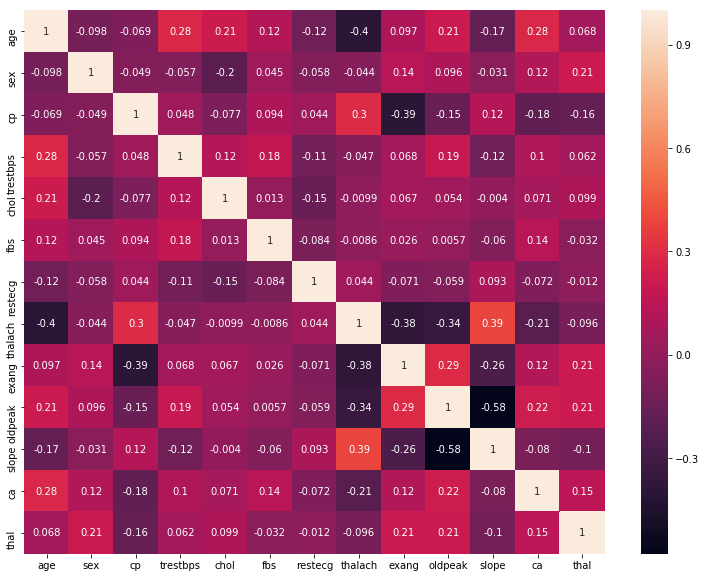

In [49]:
plt.figure(figsize=(13,10))
sns.heatmap(X.corr(),annot=True)

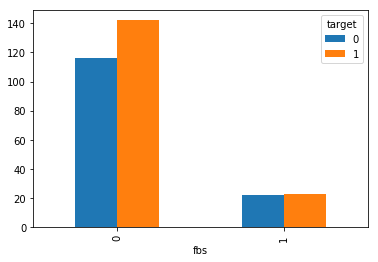

In [42]:
pd.crosstab(df.fbs,df.target).plot(kind='bar')
plt.show()

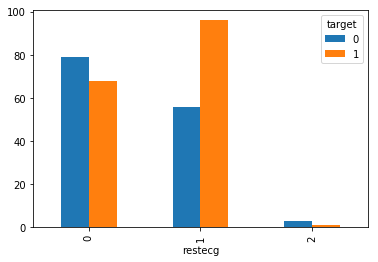

In [43]:
pd.crosstab(df.restecg,df.target).plot(kind='bar')

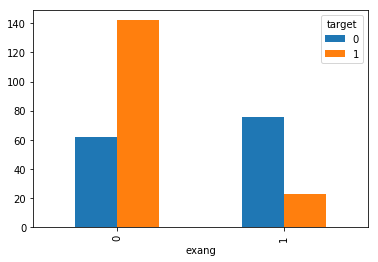

In [44]:
pd.crosstab(df.exang,df.target).plot(kind='bar')

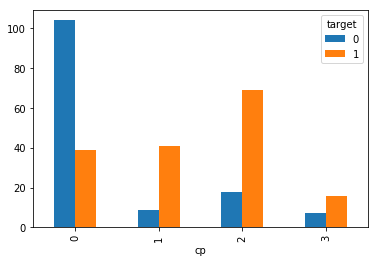

In [45]:
pd.crosstab(df.cp,df.target).plot(kind='bar')

## Creating Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [16]:
X=df.loc[:,'age':'thal']
Y=df['target']

In [17]:
X.shape

(303, 13)

In [18]:
Y.shape

(303,)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

## Importing libraries for Decision Tree Classifier & Random Forests Classifier

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from ipywidgets import interactive,IntSlider,FloatSlider,interact
import ipywidgets

In [35]:
from IPython.display import SVG,display,Image
from sklearn.tree import export_graphviz
from graphviz import Source
from subprocess import call
import matplotlib.image as mpimg

## Implementing Decision Tree Classifier

In [38]:
@interact
def plot_tree(crit=['gini','entropy'],
             split=['best','random'],
             depth=IntSlider(min=1,max=30,value=2,continuous_update=False),
             min_split=IntSlider(min=2,max=5,value=2,continuous_update=False),
             min_leaf=IntSlider(min=1,max=5,value=1,count_update=False)):
    estimator=DecisionTreeClassifier(random_state=0,criterion=crit,splitter=split,max_depth=depth,min_samples_split=min_split,
                                    min_samples_leaf=min_leaf)
    estimator.fit(x_train,y_train)
    a=accuracy_score(y_train,estimator.predict(x_train))
    b=accuracy_score(y_test,estimator.predict(x_test))
    print('Decisin Tree Training Accuracy: {:.3f}'.format(a))
    print('Decisin Tree Test Accuracy: {:.3f}'.format(b))
    
    # Implementing the Confusion Matrix
    c=confusion_matrix(y_train,estimator.predict(x_train))
    plt.figure(figsize=(5,5))
    # Plotting the Confusion Matrix
    sns.heatmap(c, xticklabels=[0,1], yticklabels= [0,1], annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    
    
    # Drawing the tree using Graphviz
    graph=Source(tree.export_graphviz(estimator,
                                     out_file=None,
                                     feature_names=x_train.columns,
                                     class_names=['0','1'],
                                      filled=True))
    display(Image(data=graph.pipe(format = 'png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Implementing Random Forests Classifier

In [48]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
             bootstrap=['True','False'],
             depth=IntSlider(min=1,max=30,value=2,continuous_update=False),
            forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
             min_split=IntSlider(min=2,max=5,value=2,continuous_update=False),
             min_leaf=IntSlider(min=1,max=5,value=1,count_update=False)):
    estimator1=RandomForestClassifier(random_state=1,
                                      criterion=crit,
                                      bootstrap=bootstrap,
                                      n_estimators=forests,
                                      max_depth=depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf=min_leaf,
                                      n_jobs=-1,
                                     verbose=False)
    estimator1.fit(x_train,y_train)
    a=accuracy_score(y_train,estimator1.predict(x_train))
    b=accuracy_score(y_test,estimator1.predict(x_test))
    print('Random Forest Training Accuracy: {:.3f}'.format(a))
    print('Random Forest Test Accuracy: {:.3f}'.format(b))
    num_tree=estimator1.estimators_[0]
    
    # Implementing the Confusion Matrix
    c=confusion_matrix(y_train,estimator1.predict(x_train))
    plt.figure(figsize=(5,5))
    # Plotting the Confusion Matrix
    sns.heatmap(c, xticklabels=[0,1], yticklabels= [0,1], annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    
    # Drawing the Forests using Graphviz
    graph=Source(tree.export_graphviz(num_tree,
                                     out_file=None,
                                     feature_names=x_train.columns,
                                     class_names=['0','1'],
                                      filled=True))
    display(Image(data=graph.pipe(format = 'png')))
    
    return estimator1

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…